In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/pronostico_dataset.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   ID;age;systolic_bp;diastolic_bp;cholesterol;prognosis  6000 non-null   object
dtypes: object(1)
memory usage: 47.0+ KB


In [ ]:
# Let's remove the delimiter

In [ ]:
data = pd.read_csv("/content/pronostico_dataset.csv", delimiter=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
data.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [ ]:
data.tail()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [ ]:
data[0:11]

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
5,5,52.181782,121.080264,110.488129,115.468279,retinopathy
6,6,68.722144,115.232290,92.730813,106.784960,retinopathy
7,7,58.716578,98.653683,94.172130,100.829654,retinopathy
8,8,59.121758,102.681371,96.991612,106.331045,retinopathy
9,9,63.624683,96.341053,80.919213,121.558605,retinopathy


In [ ]:
# yeah, prognosis is the target variable.
# Let's also check missing or duplicates!

In [ ]:
# And also we can remove ID column later right? check it!

In [ ]:
data.isnull()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5995,False,False,False,False,False,False
5996,False,False,False,False,False,False
5997,False,False,False,False,False,False
5998,False,False,False,False,False,False


In [ ]:
# seems tuff to identify so let's
data.isnull().sum()

,0
ID,0
age,0
systolic_bp,0
diastolic_bp,0
cholesterol,0
prognosis,0


In [ ]:
# good, no duplicates as well.

In [ ]:
# let's also  describe the important fellows
data.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [ ]:
# in one step we found mean, standard deviation, minimum value, maximum value, Quartiles-25%,50%,75%. yes crazy

In [ ]:
# And let's also see the data distribution. The spread Brothers

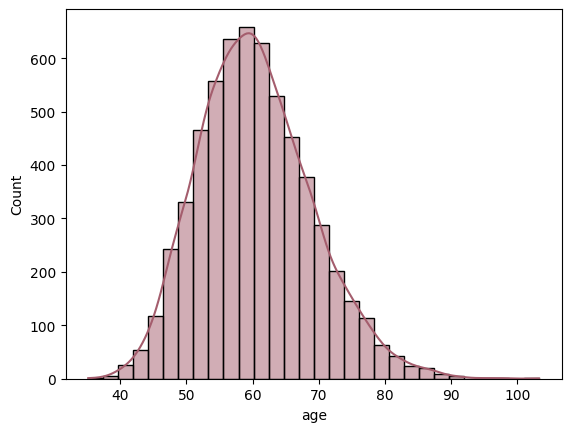

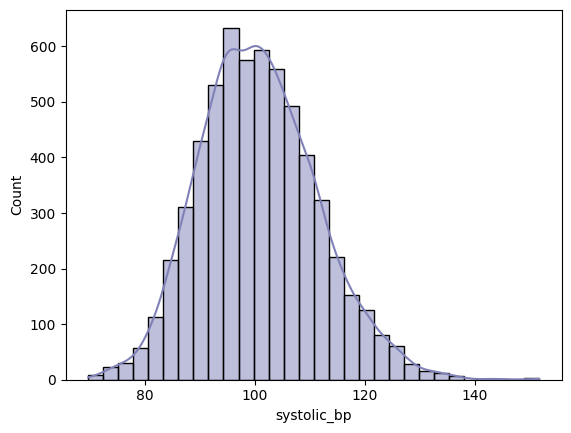

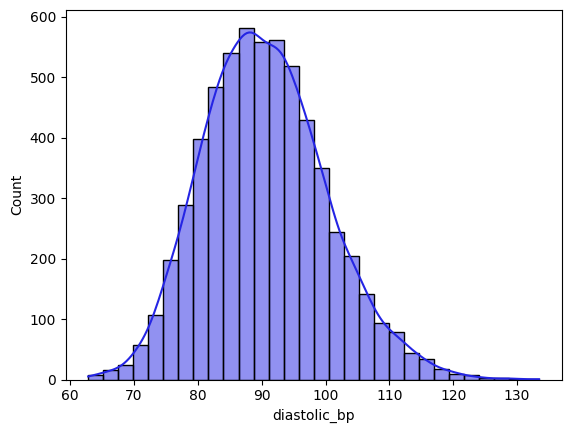

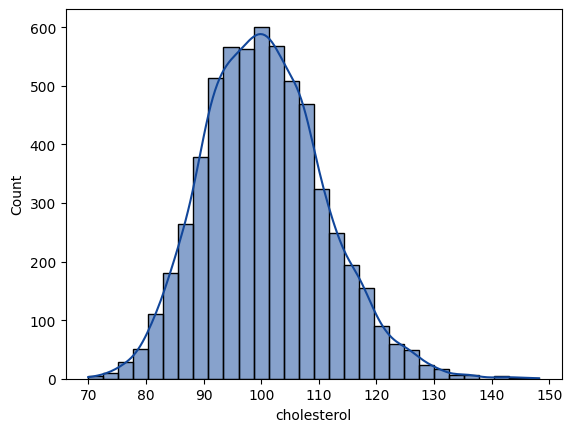

In [ ]:
# let's remove ID and Prognosis columns temporarly
import random

data_temp = data.drop(columns=['ID', 'prognosis'])
for feature in data_temp:
  random_color = (random.random(), random.random(), random.random())
  sns.histplot(data[feature], kde=True, bins=30, color=random_color)
  plt.show()

In [ ]:
# Looking like normal distribution with right skewness, got you

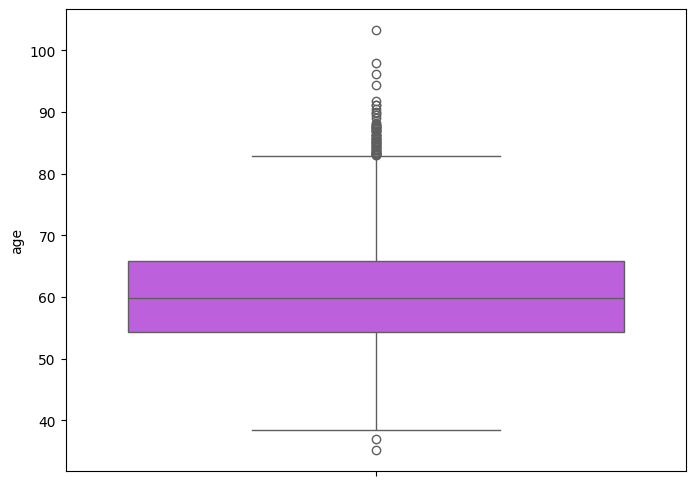

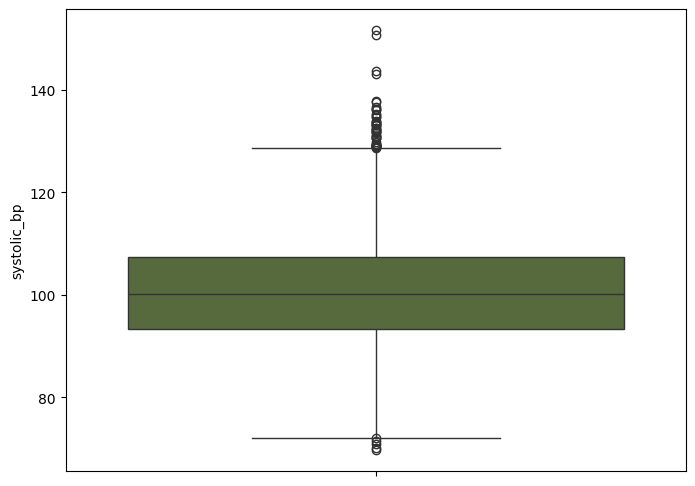

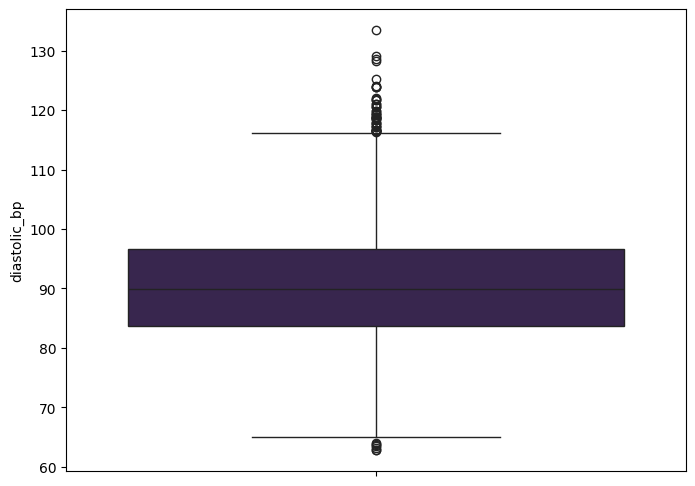

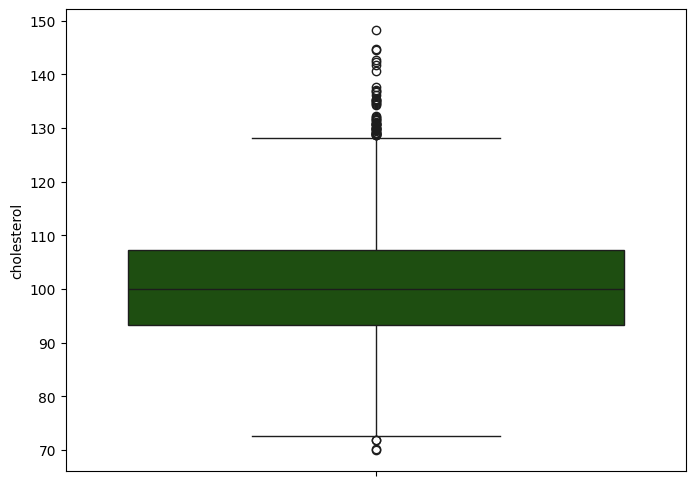

In [ ]:
# For skewness and outliers let's boxplot
for feature in data_temp:
  figure = plt.figure(figsize=(8,6))
  random_color = (random.random(), random.random(), random.random())
  sns.boxplot(data_temp[feature],color=random_color)
  plt.show()

In [ ]:
# let's remove those outliers
for feature in data_temp:
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_cleaned = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [ ]:
data_cleaned

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [ ]:
# we removed the values outside these bounds and stored

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5773 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5773 non-null   int64  
 1   age           5773 non-null   float64
 2   systolic_bp   5773 non-null   float64
 3   diastolic_bp  5773 non-null   float64
 4   cholesterol   5773 non-null   float64
 5   prognosis     5773 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 315.7+ KB


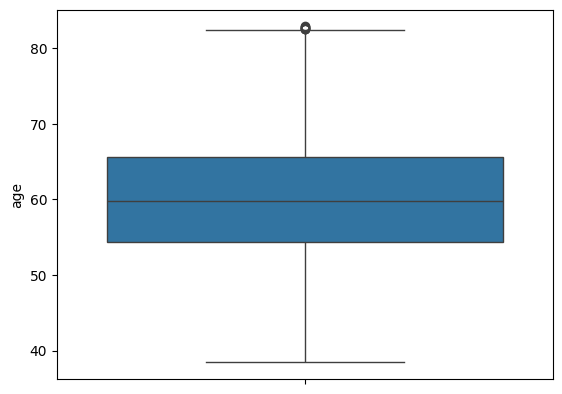

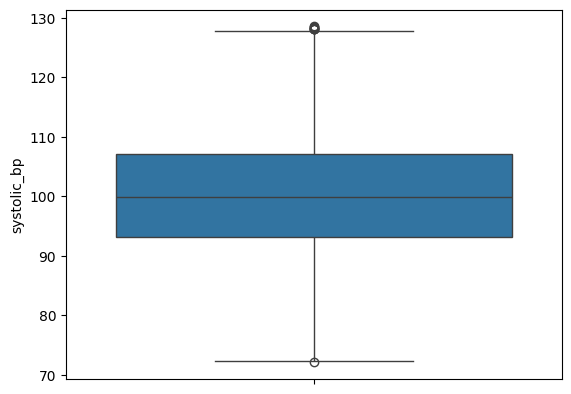

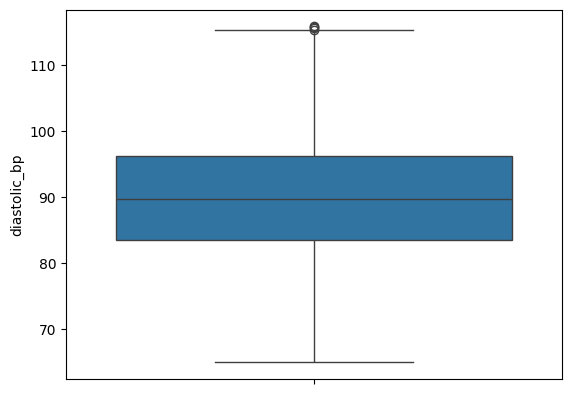

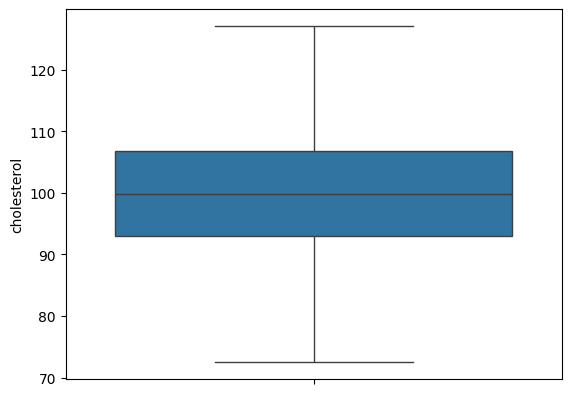

In [ ]:
# next yes!, let's visualise them
data_temp2 = data_cleaned.drop(columns=['ID', 'prognosis'])
for feature in data_temp2:
  sns.boxplot(data_temp2[feature])
  plt.show()

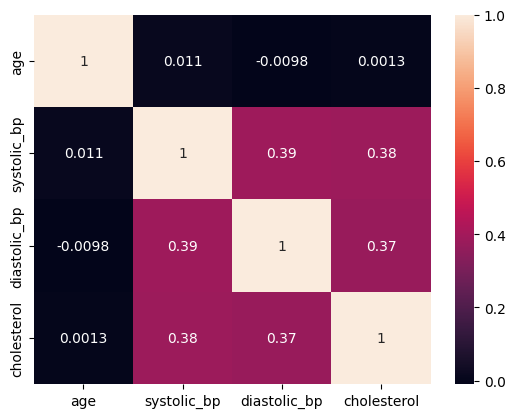

In [ ]:
# Let's find correlation
sns.heatmap(data_temp2.corr(), annot=True)
plt.show()

In [ ]:
# okay we understood the +ve correlation and -ve correlation between them,next?

In [ ]:
# In classification algorithms the outputs are 0 and 1 as we know.
# the prognosis column has to be encoded to make the true value 1 as Retinopathy and False value 0 as No_Retinopathy.
#let's goo

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encode=LabelEncoder()
data_cleaned['prognosis']=label_encode.fit_transform(data_cleaned['prognosis'])

<ipython-input-92-c395c5d04d9b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['prognosis']=label_encode.fit_transform(data_cleaned['prognosis'])


In [ ]:
# here it is
data_cleaned['prognosis'].value_counts()

,count
prognosis,
1,2899
0,2874


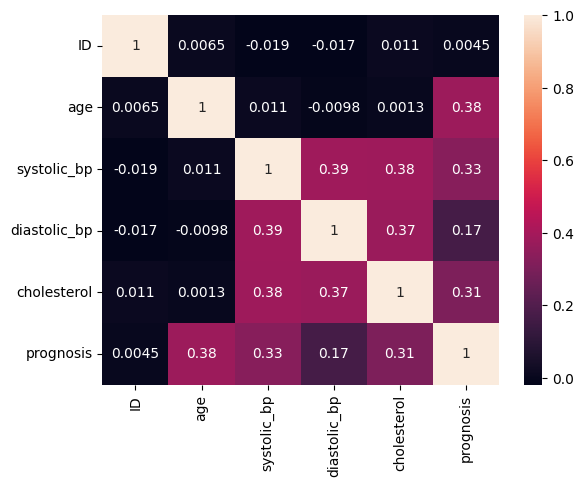

In [ ]:
sns.heatmap(data_cleaned.corr(), annot = True)
plt.show()

In [ ]:
data_cleaned.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [ ]:
# before we perform scaling we remove column? ID
data_cleaned=data_cleaned.drop(columns=['ID'])

In [ ]:
data_cleaned[0:11]

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
5,52.181782,121.080264,110.488129,115.468279,1
6,68.722144,115.232290,92.730813,106.784960,1
7,58.716578,98.653683,94.172130,100.829654,1
8,59.121758,102.681371,96.991612,106.331045,1
9,63.624683,96.341053,80.919213,121.558605,1


In [ ]:
# No 0's? okay wait
data_cleaned.tail()

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1
5999,62.506825,96.900784,86.878033,108.625436,0


In [ ]:
# Scaling let's goo

from sklearn.model_selection import train_test_split

x = data_cleaned.drop(columns=['prognosis'])
y = data_cleaned['prognosis']



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled.shape

(4618, 4)

In [ ]:
x_test_scaled.shape

(1155, 4)

In [ ]:
# Done with scaling let's build the models and deploy our best model


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_log = logistic_model.predict(x_train_scaled)

In [ ]:
# Let's evaluate them
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, confusion_matrix, classification_report

accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

In [ ]:
print("Accuracy : " ,accuracy_log)
print("Precision : " ,precision_log)
print("Recall : " ,recall_log)
print("F1_score : " ,f1_log)
confusion_log = confusion_matrix(y_test, y_pred_log)
confusion_log

Accuracy :  0.6493506493506493
Precision :  0.6470588235294118
Recall :  0.6504347826086957
F1_score :  0.6487424111014745


array([[376, 204],
       [201, 374]])

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_tree = DecisionTreeClassifier(random_state=42)
dt_tree.fit(x_train_scaled, y_train)
y_pred_dt = dt_tree.predict(x_test_scaled)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [ ]:
print("Accuracy : " ,accuracy_dt)
print("Precision : " ,precision_dt)
print("Recall : " ,recall_dt)
print("F1_score : " ,f1_dt)
confusion_log = confusion_matrix(y_test, y_pred_dt)
confusion_log

Accuracy :  0.6493506493506493
Precision :  0.6470588235294118
Recall :  0.6504347826086957
F1_score :  0.6487424111014745


array([[376, 204],
       [201, 374]])

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
random_forest = RandomForestClassifier(random_state=42,n_jobs=-1)

In [ ]:
random_forest.fit(x_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
y_pred_random = random_forest.predict(x_test_scaled)

In [ ]:
accuracy_random = accuracy_score(y_test,y_pred_random)
precision_random = precision_score(y_test,y_pred_random)
recall_random = recall_score(y_test,y_pred_random)
f1_random = f1_score(y_test,y_pred_random)

In [ ]:
print("Accuracy : " ,accuracy_random)
print("Precision : " ,precision_random)
print("Recall : " ,recall_random)
print("F1_score : " ,f1_random)
confusion_log = confusion_matrix(y_test, y_pred_random)
confusion_log

Accuracy :  0.7350649350649351
Precision :  0.7260504201680672
Recall :  0.7513043478260869
F1_score :  0.7384615384615385


array([[417, 163],
       [143, 432]])

## Support Vector classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
support_classifier = SVC(random_state=42)

In [ ]:
support_classifier.fit(x_train_scaled,y_train)

SVC(random_state=42)

In [ ]:
y_pred_svc = support_classifier.predict(x_test_scaled)

In [ ]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)
precision_svc = precision_score(y_test,y_pred_svc)
recall_svc = recall_score(y_test,y_pred_svc)
f1_svc = f1_score(y_test,y_pred_svc)

In [ ]:
print("Accuracy : " ,accuracy_svc)
print("Precision : " ,precision_svc)
print("Recall : " ,recall_svc)
print("F1_score : " ,f1_svc)
confusion_log = confusion_matrix(y_test, y_pred_svc)
confusion_log

Accuracy :  0.7341991341991342
Precision :  0.7147435897435898
Recall :  0.7756521739130435
F1_score :  0.74395329441201


array([[402, 178],
       [129, 446]])

## K - Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_KNN = KNN.predict(x_test_scaled)

In [ ]:
accuracy_knn = accuracy_score(y_test,y_pred_KNN)
precision_knn = precision_score(y_test,y_pred_KNN)
recall_knn = recall_score(y_test,y_pred_KNN)
f1_knn = f1_score(y_test,y_pred_KNN)

In [ ]:
print("Accuracy : " ,accuracy_knn)
print("Precision : " ,precision_knn)
print("Recall : " ,recall_knn)
print("F1_score : " ,f1_knn)
confusion_log = confusion_matrix(y_test, y_pred_KNN)
confusion_log

Accuracy :  0.7194805194805195
Precision :  0.7102177554438861
Recall :  0.7373913043478261
F1_score :  0.7235494880546075


array([[407, 173],
       [151, 424]])

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [196]:
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [198]:
gboost.fit(x_train_scaled,y_train)

GradientBoostingClassifier(random_state=42)

In [199]:
y_pred_gboost = gboost.predict(x_test_scaled)

In [200]:
accuracy_gboost = accuracy_score(y_test,y_pred_gboost)
precision_gboost = precision_score(y_test,y_pred_gboost)
recall_gboost = recall_score(y_test,y_pred_gboost)
f1_gboost = f1_score(y_test,y_pred_gboost)

In [201]:
print("Accuracy : " ,accuracy_gboost)
print("Precision : " ,precision_gboost)
print("Recall : " ,recall_gboost)
print("F1_score : " ,f1_gboost)
confusion_log = confusion_matrix(y_test, y_pred_gboost)
confusion_log

Accuracy :  0.7316017316017316
Precision :  0.7140549273021002
Recall :  0.768695652173913
F1_score :  0.7403685092127303


array([[403, 177],
       [133, 442]])

## XGBoost Classifier

In [202]:
from xgboost import XGBClassifier

In [229]:
xgb_model = XGBClassifier( eval_metric = 'logloss', use_label_encoder=False)

In [230]:
xgb_model.fit(x_train_scaled,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:58:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [231]:
y_pred_xgb=xgb_model.predict(x_test_scaled)

In [232]:
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)

In [236]:
print("Accuracy : " ,accuracy_xgb)
print("Precision : " ,precision_xgb)
print("Recall : " ,recall_xgb)
print("F1_score : " ,f1_xgb)
confusion_log = confusion_matrix(y_test, y_pred_xgb)
confusion_log

Accuracy :  0.7073593073593074
Precision :  0.6908212560386473
Recall :  0.7460869565217392
F1_score :  0.717391304347826


array([[388, 192],
       [146, 429]])

## Hyper Parameter Tuning for xgb

In [237]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  #to balance between speed and accuracy.
    'learning_rate': [0.01, 0.1, 0.2], #to explore slow, moderate, and fast learning rates.
    'max_depth': [3, 5, 7], #to balance simplicity and complexity.
    'subsample': [0.6, 0.8, 1.0]
}

In [240]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                   param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(x_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:02:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [241]:
# Get best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [243]:
# Train best model
xgb_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(x_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:03:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [245]:
# Predictions with optimized model
y_pred_optimized = xgb_best.predict(x_test_scaled)

In [255]:
# Evaluate optimized model
print("Optimized Model Performance:")
accuracy_xgb_opt = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy_xgb_opt: ", accuracy_xgb_opt)
print(classification_report(y_test, y_pred_optimized))

Optimized Model Performance:
Accuracy_xgb_opt:  0.7376623376623377
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       580
           1       0.72      0.76      0.74       575

    accuracy                           0.74      1155
   macro avg       0.74      0.74      0.74      1155
weighted avg       0.74      0.74      0.74      1155



In [249]:
models = ['Logistic Regression','Decision Tree', 'Random Forest','SVC','KNN','Gradient Boosting','XGBoost']

In [256]:
model_accuracies = [accuracy_log, accuracy_dt,accuracy_random,accuracy_svc,accuracy_knn,accuracy_gboost,accuracy_xgb_opt]

In [257]:
Accuracy_list = pd.DataFrame({"Classifier Models" : models, "Accuracy":model_accuracies})

In [258]:
Accuracy_list.sort_values(by="Accuracy",ascending=False)

,Classifier Models,Accuracy
6,XGBoost,0.737662
2,Random Forest,0.735065
3,SVC,0.734199
5,Gradient Boosting,0.731602
4,KNN,0.719481
1,Decision Tree,0.649351
0,Logistic Regression,0.649351


We can go with hyperparameter tunig for all the models, and choose the best one.

In [226]:
# Altough we are not satisfied with the models accuracy, we are going to improve the model accuracy by tuning. Let's do it!
# Insted tuning all the models, let's do it for the models initally with good accuracy

In [ ]:
# logistic and Decision Tree given very low accuracy

In [227]:
# gridseachcv takes more time cause it iterates every possible way, whereas Randomizedsearchcv selects randomly. so, let's go

## Deployment

In [259]:
import pickle

# Save model
with open("xgboost_model.pkl", "wb") as model_file:
    pickle.dump(xgb_best, model_file)
print("XGBoost model saved successfully!")

XGBoost model saved successfully!


let's visualize how well it got seperated

In [264]:
# Visualizing the decision boundary for first two principal components
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Reducing feature dimensions for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)


In [266]:
xgb_best_pca = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best_pca.fit(x_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:11:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

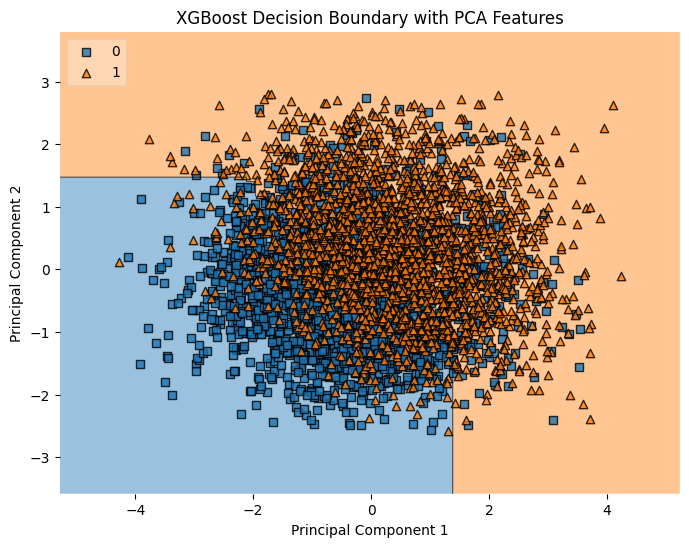

In [268]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_regions(x_train_pca, y_train.to_numpy(), clf=xgb_best_pca, legend=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("XGBoost Decision Boundary with PCA Features")
plt.show()